In [112]:
## importing necessary libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import copy
import os
os.chdir("D:\Scaler_Masters\BusinessCases\JamboreeEducation")

In [113]:
df = pd.read_csv('jamboree_admission.csv')

In [114]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [115]:
## Displaying the data type of each column present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [116]:
## Displaying the number of rows and columns present in the dataset
df.shape

(500, 9)

In [117]:
## Checking for any missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [118]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [119]:
df.columns = map(lambda x: x.strip(), df.columns)


There is no categorical variables present in the dataset, all the vaiables are numerical and continuous

In [120]:
n_variables = ['GRE Score', 'TOEFL Score', 'CGPA', 'Research', 'LOR','University Rating','SOP', 'Chance of Admit']

In [121]:
### Distribution of numerical/continuos Variables
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

n_variables = ['GRE Score', 'TOEFL Score', 'CGPA', 'Research', 'LOR','University Rating','SOP', 'Chance of Admit']


# Calculate number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Create subplots
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=n_variables)

# Adding histograms with KDE in a loop
for i, c in enumerate(n_variables):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1

    # Adding histogram
    fig.add_trace(
        go.Histogram(x=df[c], nbinsx=25, histnorm='density', name=c, opacity=0.95),
        row=row, col=col
    )

    # Adding KDE line
    kde_x, kde_y = ff.create_distplot([df[c]], [c], show_hist=False)['data'][0]['x'], \
        ff.create_distplot([df[c]], [c], show_hist=False)['data'][0]['y']
    fig.add_trace(
        go.Scatter(x=kde_x, y=kde_y, mode='lines', name=f'KDE {c}'),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title="Histograms with KDE",
    height=800, width=800,
    showlegend=False
)

fig.show()

In [122]:
## Checking for Outliers using BoxPlots


import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, cols=3,
    
)

# Creating subplots
for i,c in enumerate(n_variables):
    row = (i//3) +1
    col = (i % 3) + 1
    fig.add_trace(go.Box(y=df[c], name=c), row=row, col=col)
    fig.update_layout(
        height=600, width=1100,
        title_text="Box Plots of Different Variables",
        showlegend=False
    )

# Showing the plots
fig.show()



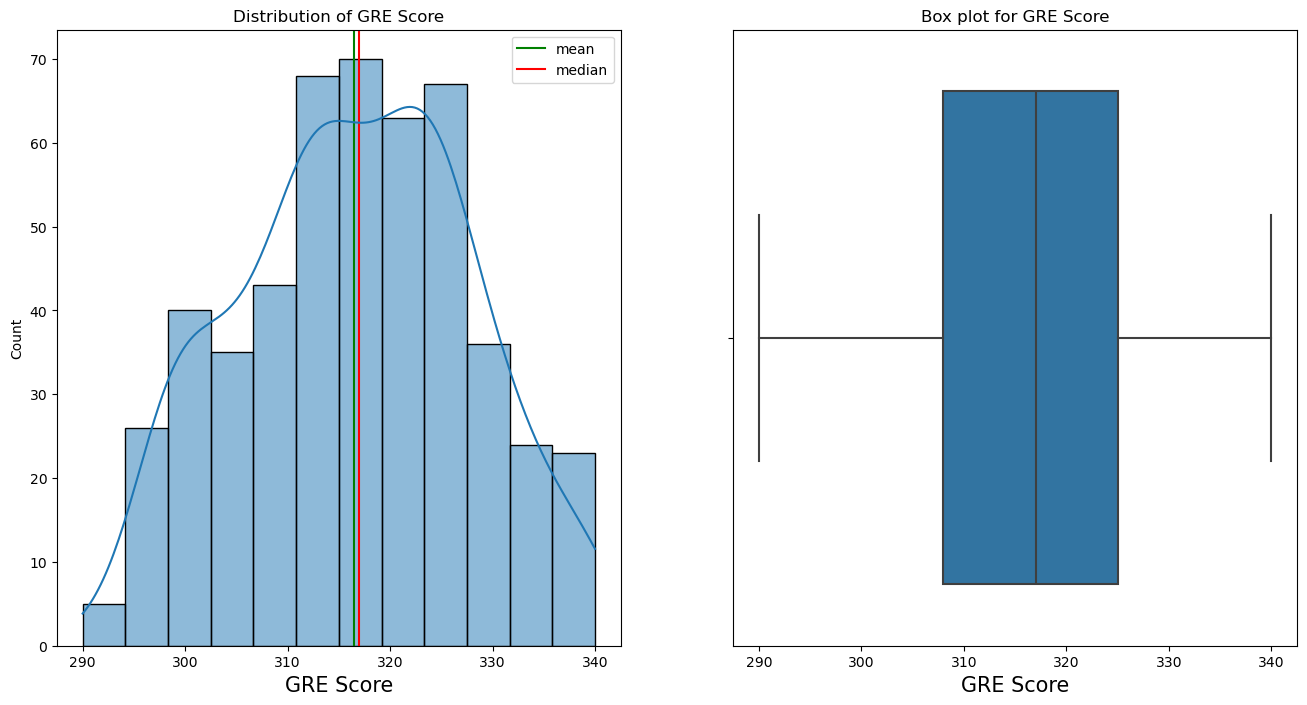

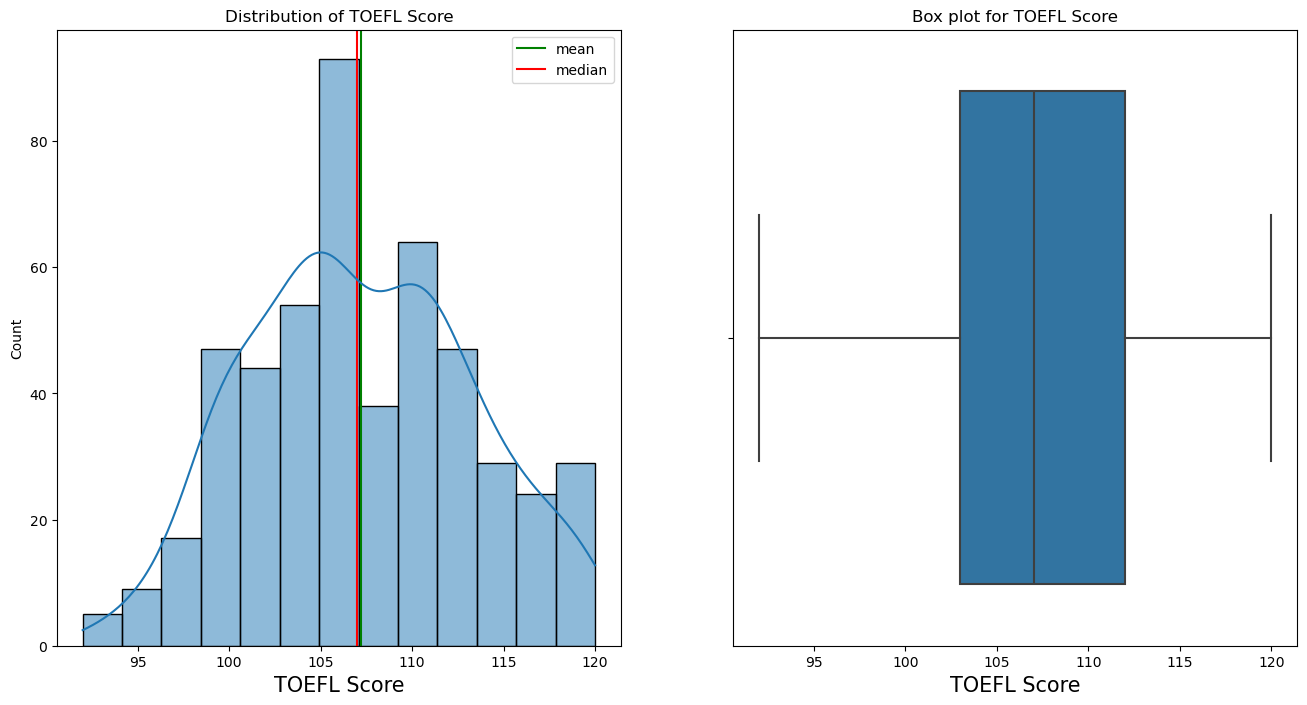

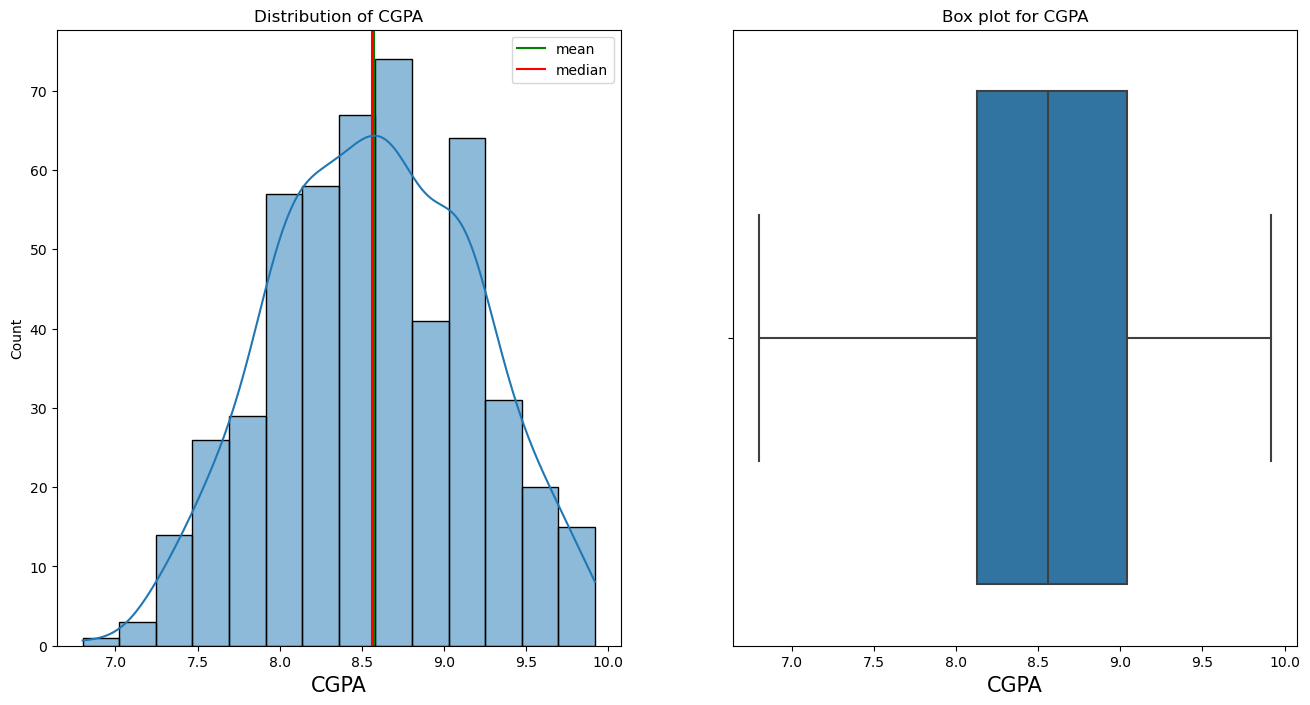

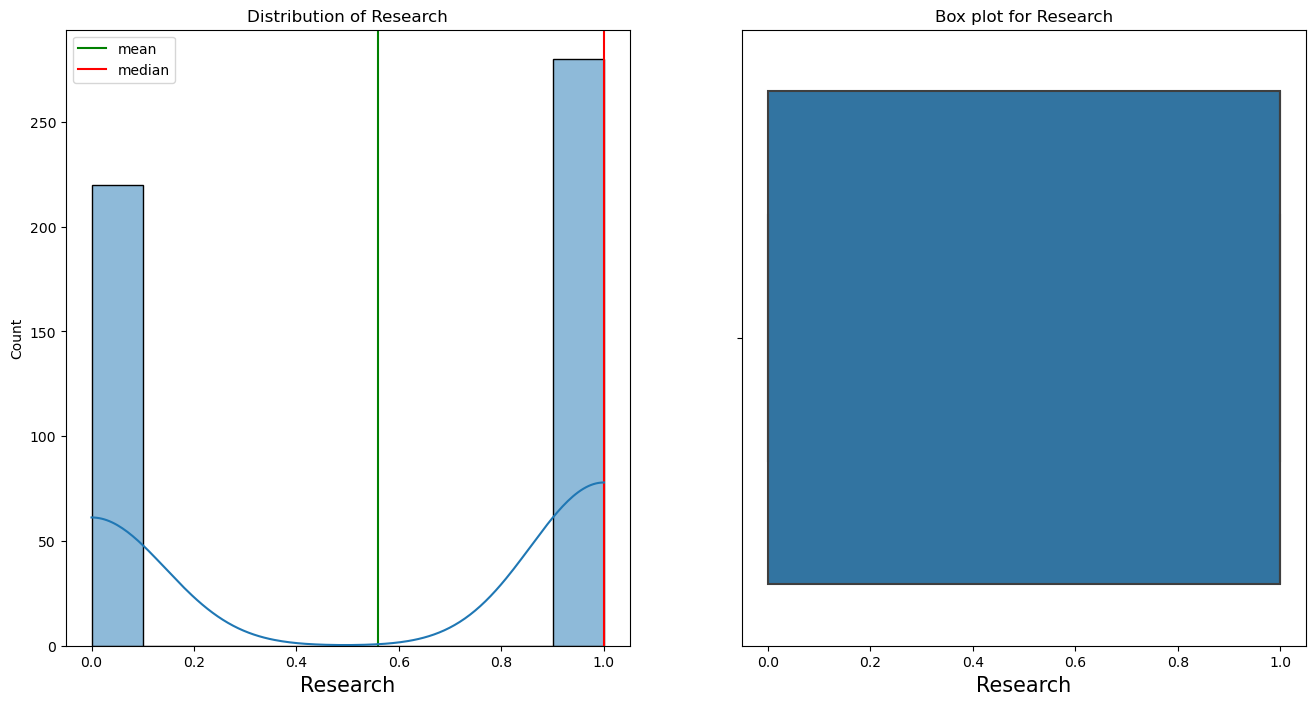

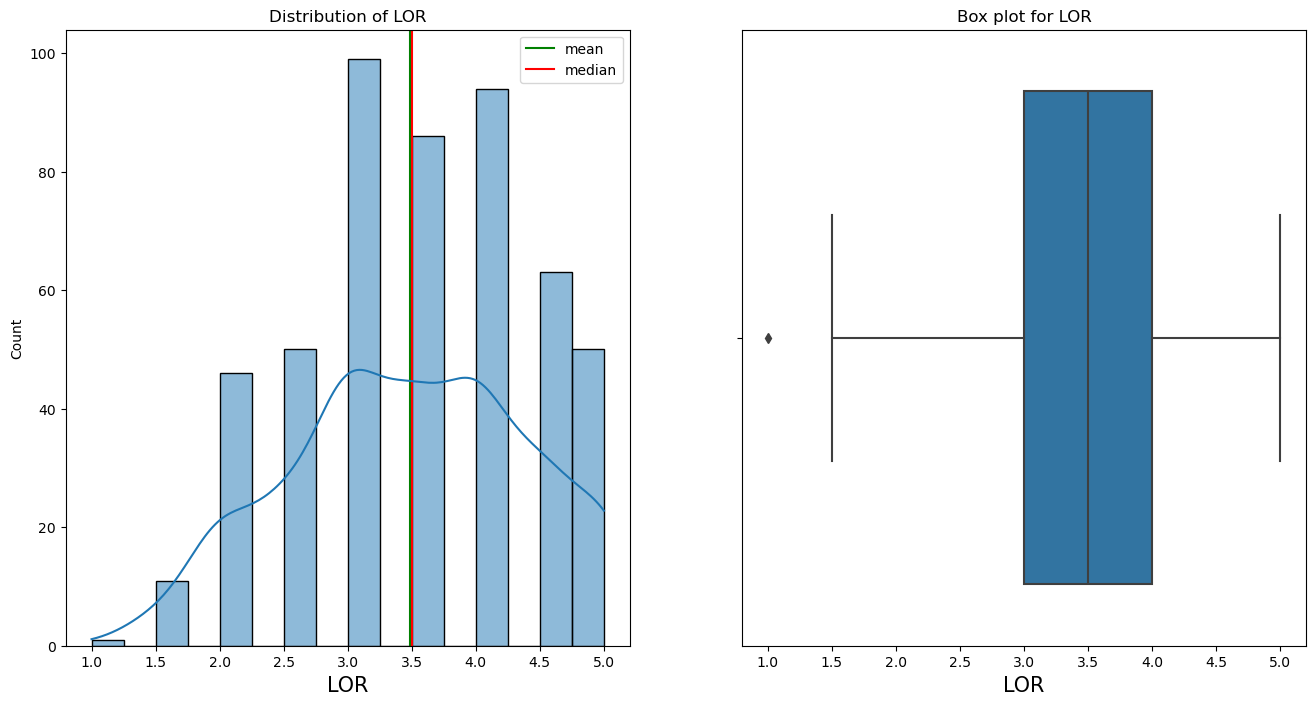

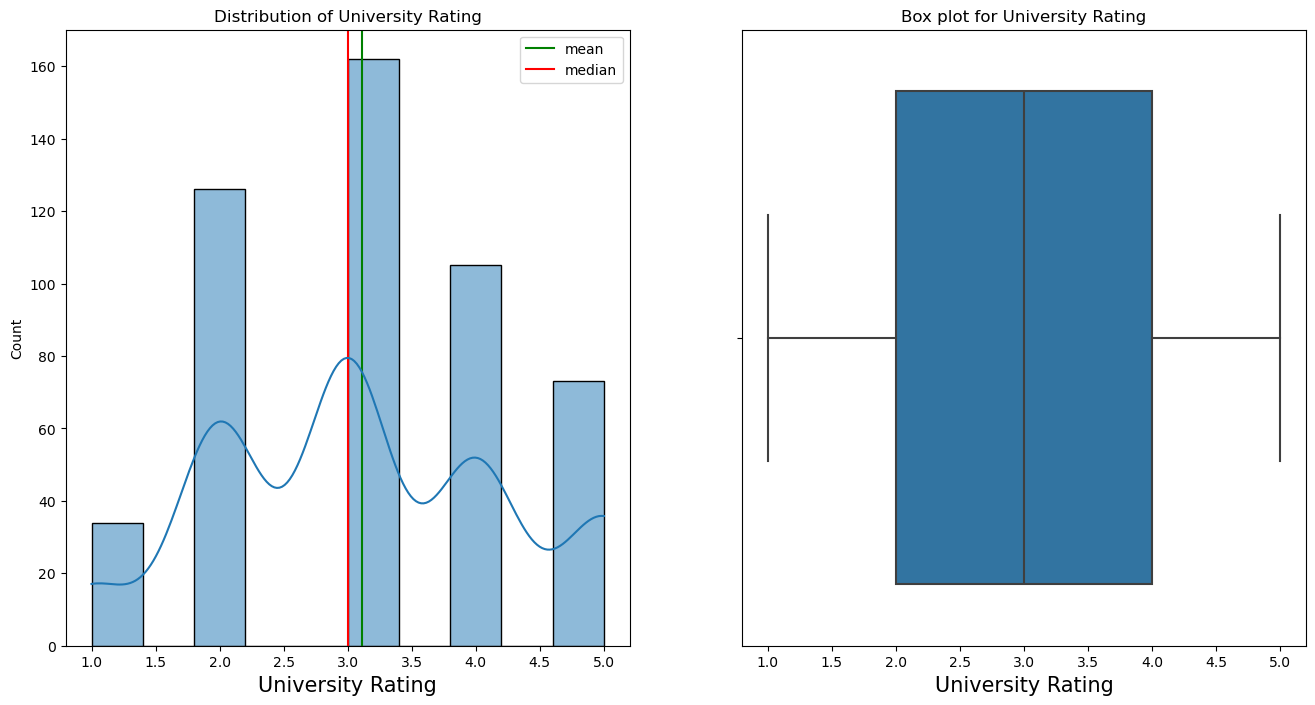

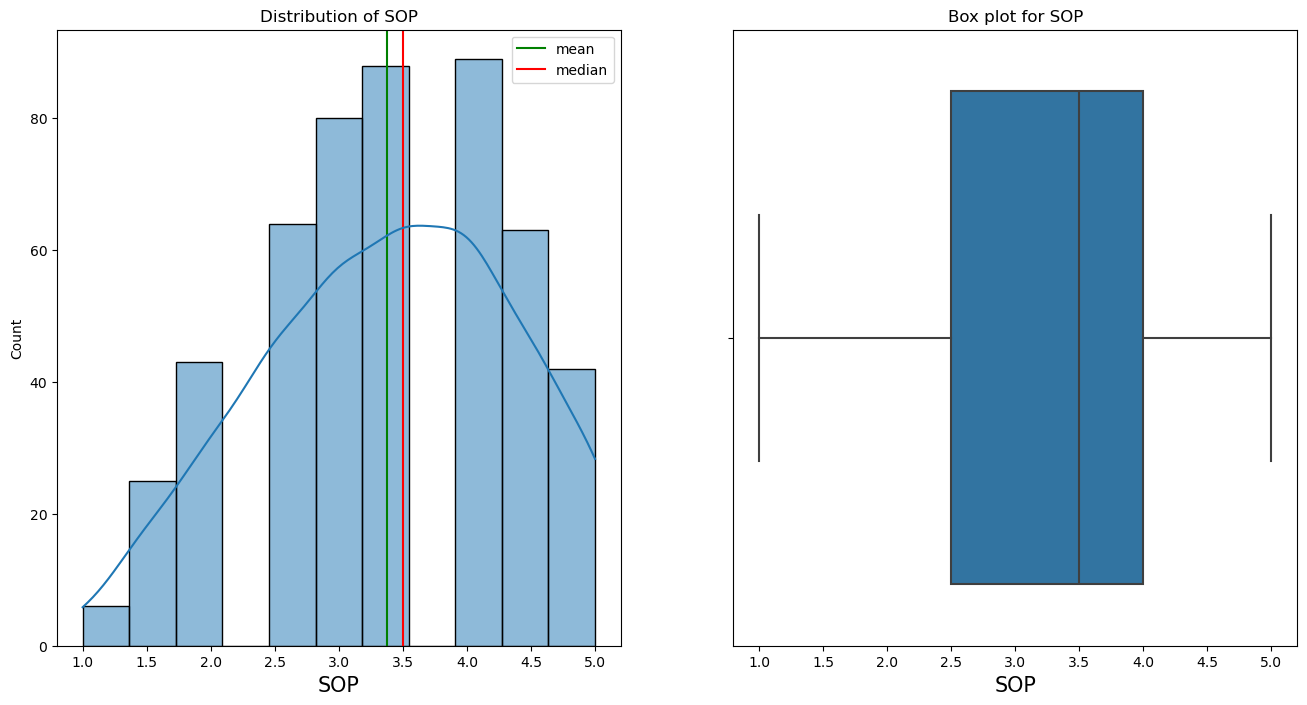

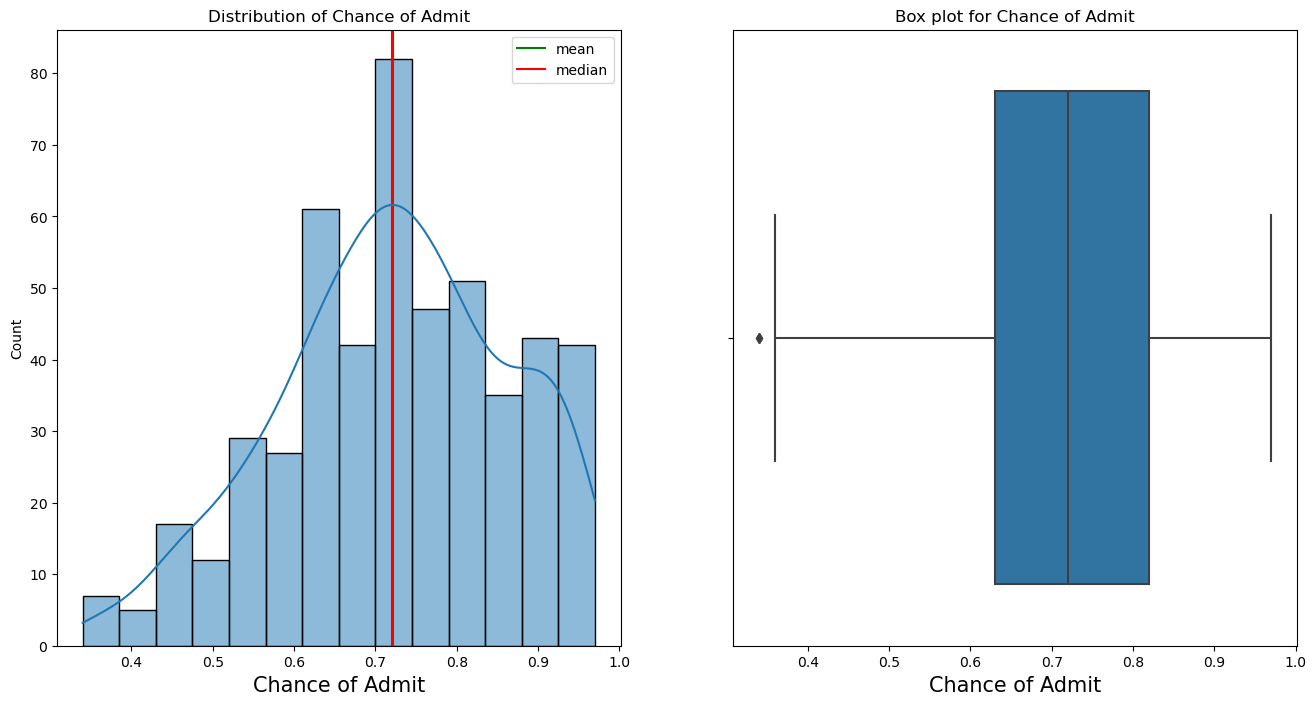

In [123]:
for i in range(len(n_variables)):
    fig = plt.figure(figsize = (16, 8))
    
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {n_variables[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    ax1.axvline(df[n_variables[i]].mean(),color="green", label = "mean")
    ax1.axvline(df[n_variables[i]].median(),color="red", label = "median")
    ax1.legend(loc = "best")
    sns.histplot(data=df, x=n_variables[i], ax=ax1, kde=True)
    
    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {n_variables[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    sns.boxplot(data = df, x=n_variables[i], ax=ax2)
    
plt.show()

Since there are no outliers present in the data its good to go for standardization

### Bi-Variate Analysis

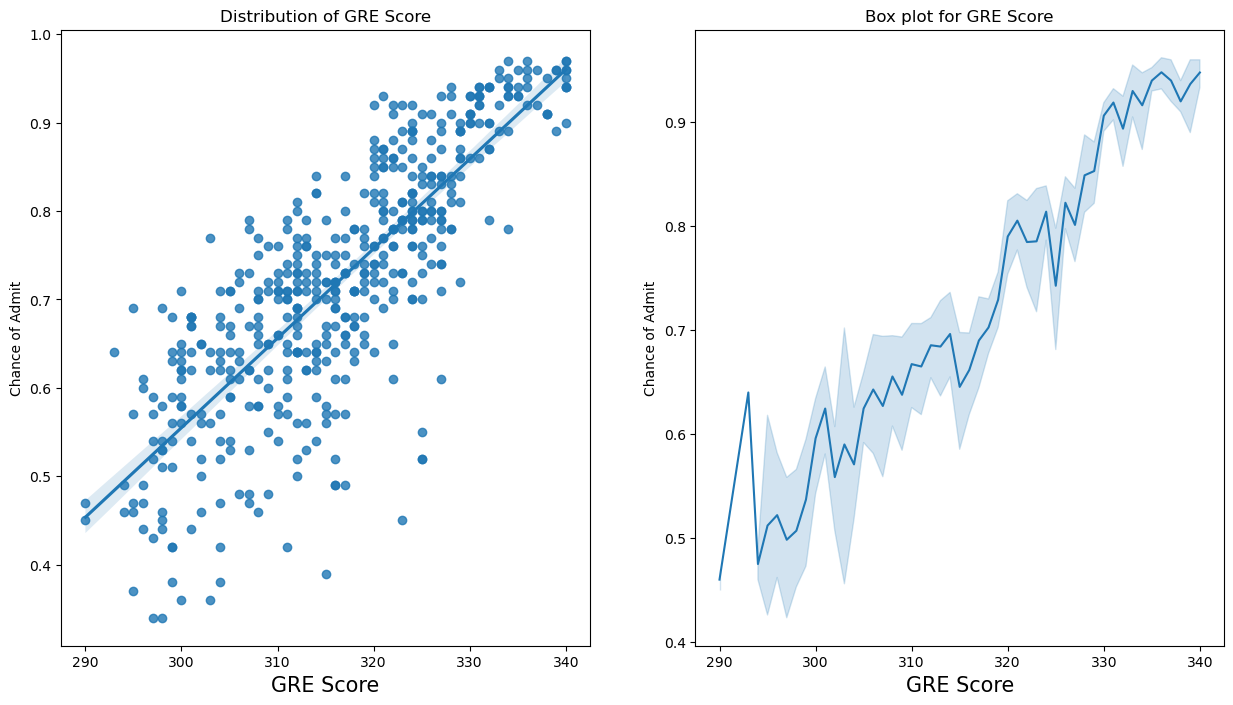

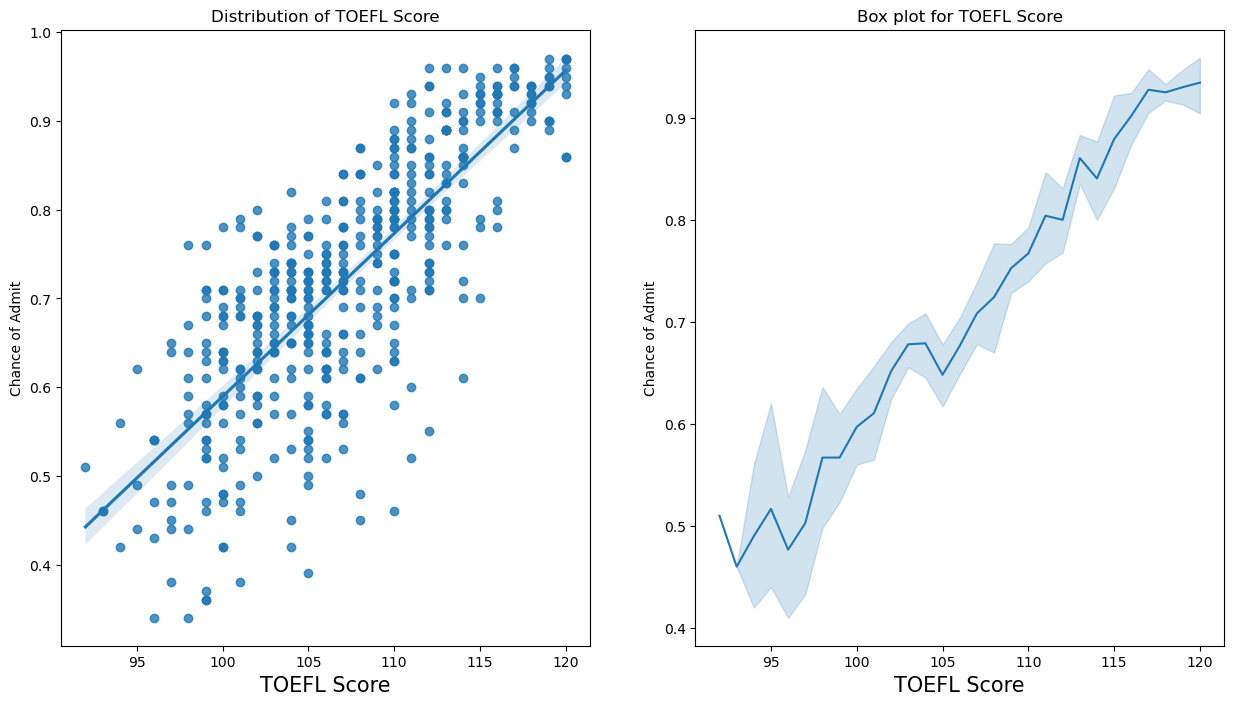

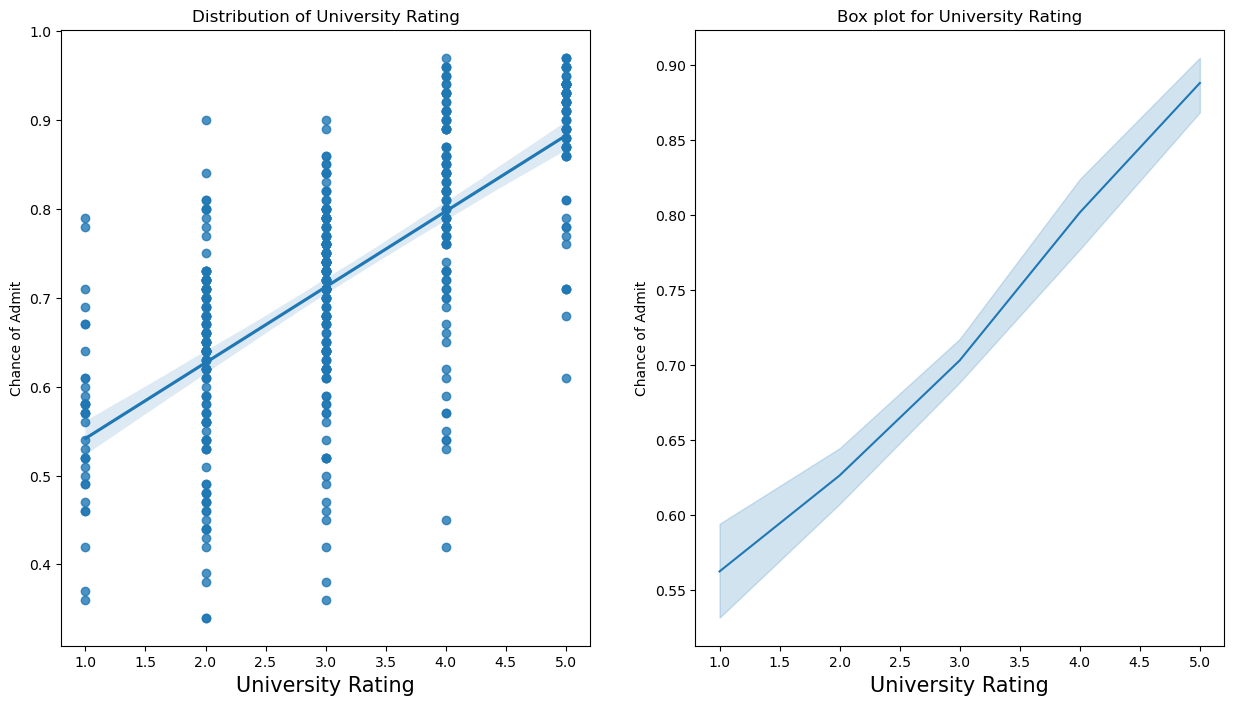

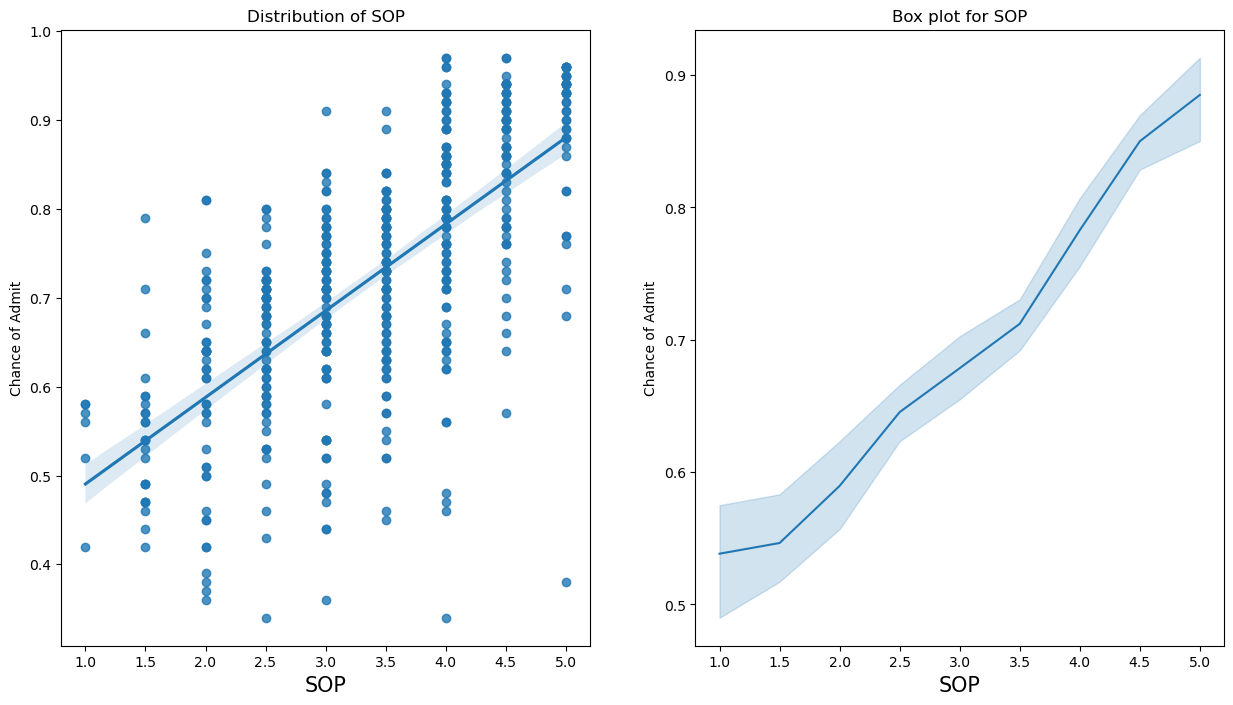

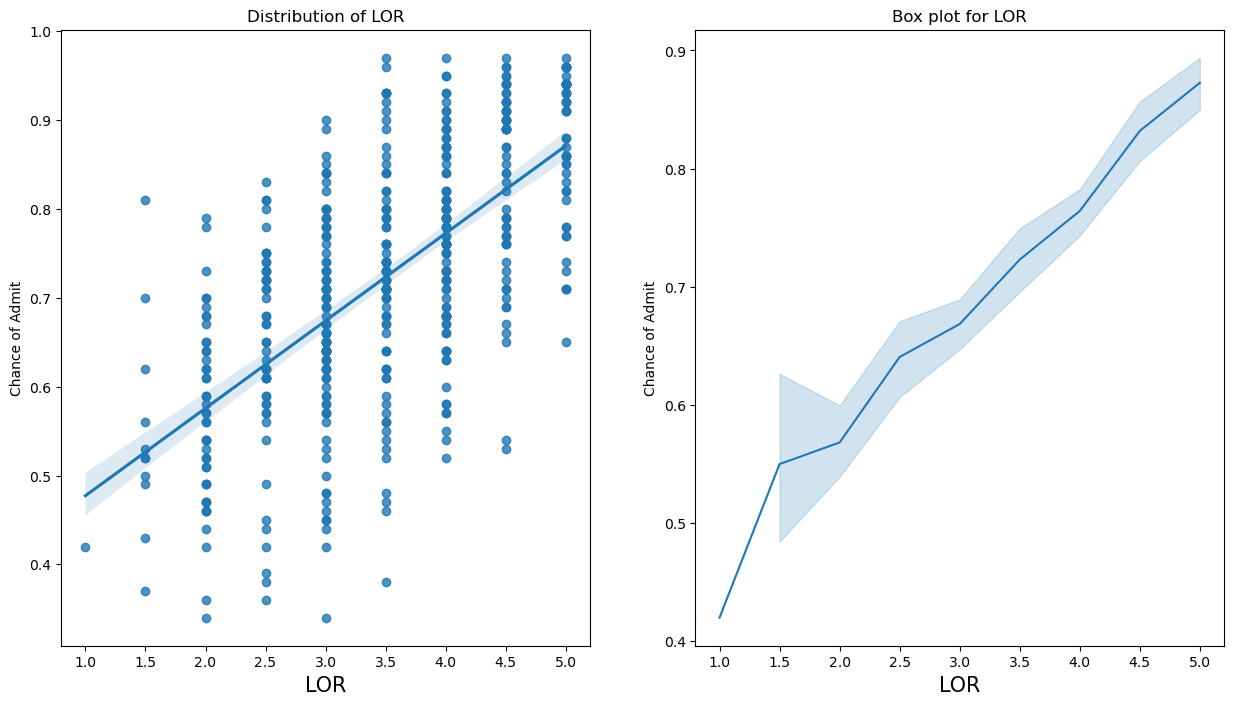

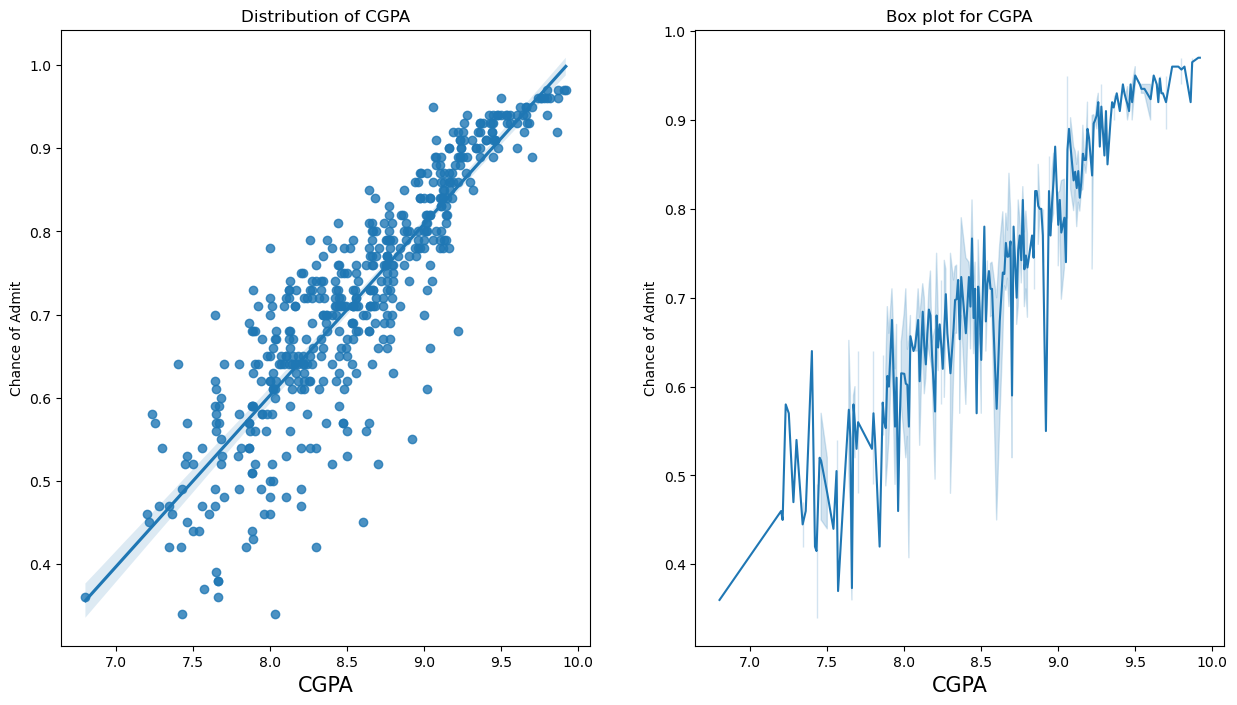

In [124]:
n_variables= ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"]
target = "Chance of Admit"

for i in range(len(n_variables)):
    fig = plt.figure(figsize = (15, 8))
    
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {n_variables[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
#     sns.histplot(data=jamboree, x=num_cat[i], ax=ax1, kde=True)
    sns.regplot(data=df, ax=ax1, x=n_variables[i], y=target)
    
    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {n_variables[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
#     sns.boxplot(data = jamboree, x=num_cat[i], ax=ax2)
    sns.lineplot(data=df, x=n_variables[i], y=target, ax=ax2)
    
plt.show()

#### Heatmaps

In [125]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='tropic',
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    hovertemplate='%{y} vs %{x}: %{z:.4f}<extra></extra>',
    text=correlation_matrix.values))

# Update layout for better readability
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_nticks=36,
    yaxis_nticks=36,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0)
)

# Show the heatmap
fig.show()

In [126]:
# Identify and drop highly correlated features

corr_matrix = numeric_df.corr()
threshold = 0.90
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

df_reduced = df.drop(columns=to_drop)

print("Features to drop:", to_drop)
print("-" * 10)
print("Reduced DataFrame:\n", df_reduced)

Features to drop: set()
----------
Reduced DataFrame:
      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1        337          118                  4  4.5  4.5  9.65   
1             2        324          107                  4  4.0  4.5  8.87   
2             3        316          104                  3  3.0  3.5  8.00   
3             4        322          110                  3  3.5  2.5  8.67   
4             5        314          103                  2  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
495         496        332          108                  5  4.5  4.0  9.02   
496         497        337          117                  5  5.0  5.0  9.87   
497         498        330          120                  5  4.5  5.0  9.56   
498         499        312          103                  4  4.0  5.0  8.43   
499         500        327          113                  4  4.5  4.5  9.04   

     Res

There is no high corelation between any of the variables, so all the variables can be considered as significant individual contributors  

### Train-Test Split

In [127]:
from sklearn.model_selection import train_test_split

X = df_reduced.drop(['Chance of Admit'], axis=1)
y = df_reduced['Chance of Admit']

print("X shape: {}".format(X.shape))
print("-" * 18)
print("y shape: {}".format(y.shape))

X shape: (500, 8)
------------------
y shape: (500,)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print("X_train shape: {}".format(X_train.shape))
print("-" * 18)
print("X_test shape: {}".format(X_test.shape))
print("-" * 18)
print("y_train shape: {}".format(y_train.shape))
print("-" * 18)
print("y_test shape: {}".format(y_test.shape))

X_train shape: (400, 8)
------------------
X_test shape: (100, 8)
------------------
y_train shape: (400,)
------------------
y_test shape: (100,)


#### Feature Standardization

In [129]:
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [130]:
X_train = pd.DataFrame(data = X_train_std, columns = X_train_columns)
X_train.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.112785,-1.336819,-1.638985,-0.942444,-0.359303,-0.544068,-1.129571,0.881917
1,0.308684,1.191650,1.081322,-0.091479,1.143010,1.052220,1.070210,0.881917
2,-0.974105,0.319764,0.441250,-0.942444,0.642239,-0.011972,-0.029681,-1.133893
3,0.488968,-0.116179,-0.518858,-0.091479,-0.359303,-1.076164,-0.401703,-1.133893
4,-1.182125,0.494141,1.241340,1.610452,0.642239,1.052220,1.264308,0.881917


In [131]:
y_train = y_train.values.reshape(len(y_train), 1)
y_train.shape

(400, 1)

### Linear Regression using StatsModel

In [132]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_sm= sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_sm)
results = model.fit()

# Display the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     244.1
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          6.87e-147
Time:                        12:40:19   Log-Likelihood:                 569.48
No. Observations:                 400   AIC:                            -1121.
Df Residuals:                     391   BIC:                            -1085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7238      0.00

#### Displaying model coefficients


In [134]:
print("Model Coefficients:")
print(results.params)

Model Coefficients:
const                0.723775
Serial No.           0.010974
GRE Score            0.019369
TOEFL Score          0.021633
University Rating    0.002948
SOP                  0.010638
LOR                  0.015519
CGPA                 0.067601
Research             0.011106
dtype: float64


#### Displaying pvalues

In [133]:
results.pvalues

const                0.000000e+00
Serial No.           2.874271e-04
GRE Score            2.711388e-03
TOEFL Score          2.626773e-04
University Rating    5.520483e-01
SOP                  3.994046e-02
LOR                  3.002292e-04
CGPA                 2.532439e-22
Research             2.364052e-03
dtype: float64

There are no columns with p-value > 0.05

#### Check for VIF

In [150]:
### A Function to calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


In [159]:
calculate_vif(X_train)


,Feature,VIF
0,Serial No.,1.035566
1,GRE Score,4.742817
2,TOEFL Score,3.972258
3,University Rating,2.825377
4,SOP,3.067192
5,LOR,2.083881
6,CGPA,4.919482
7,Research,1.516551


VIF look fine since all the values are below 5

### Calculating Residuals

In [160]:
### Calculating Residuals 

residuals = results.resid
print(f"Mean of residuals: {np.mean(residuals)}")

Mean of residuals: -2.972622148433857e-16


Linear relationship between independent & dependent variables

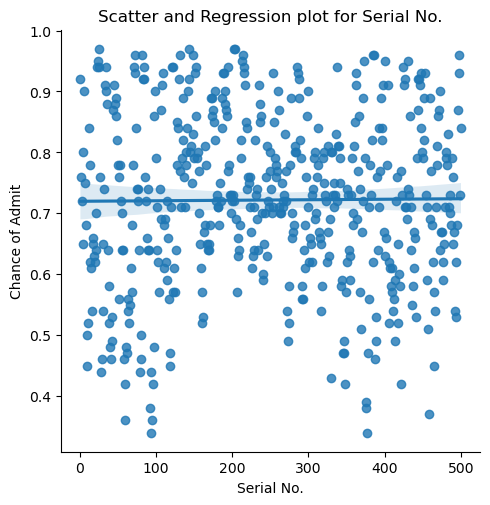

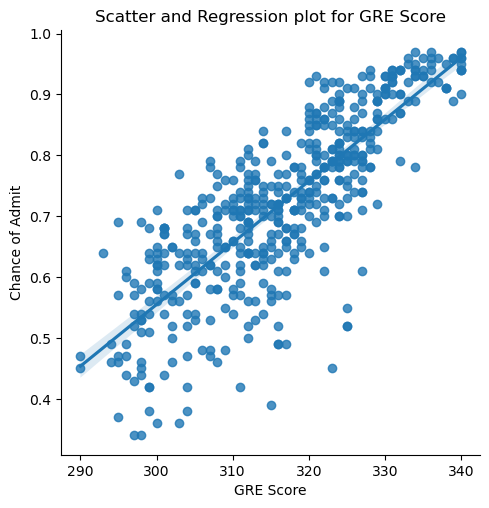

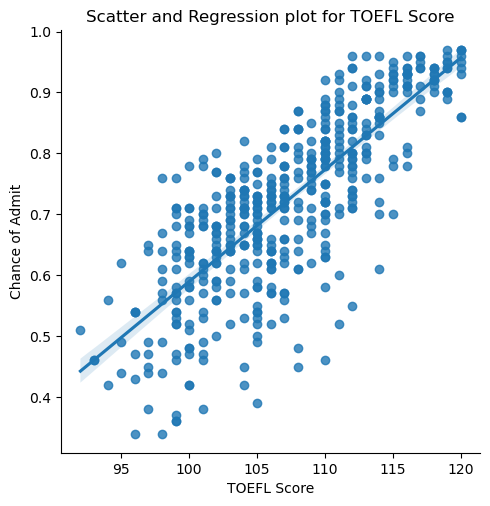

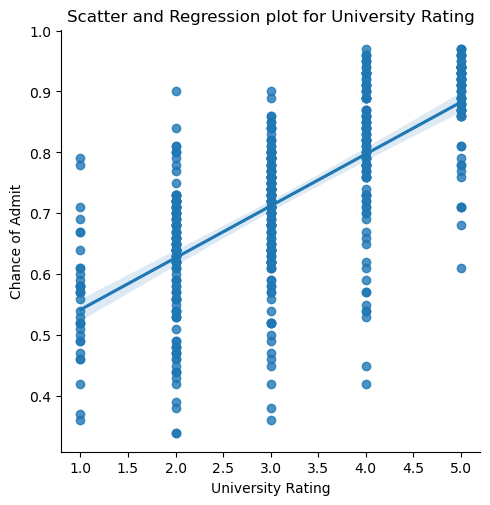

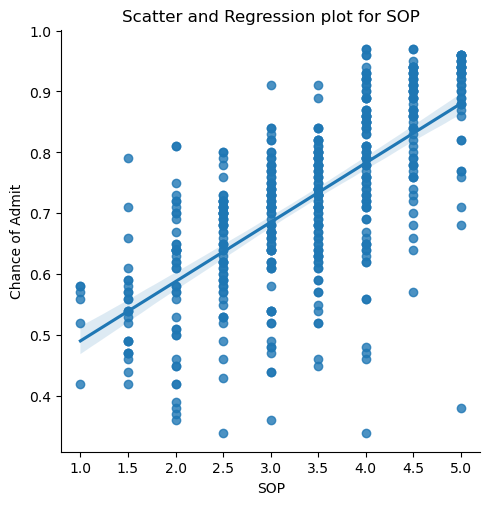

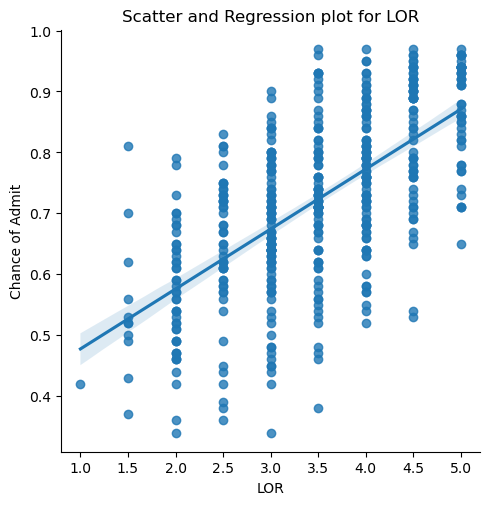

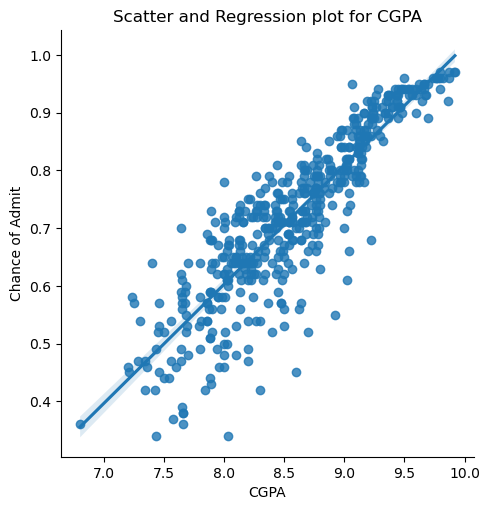

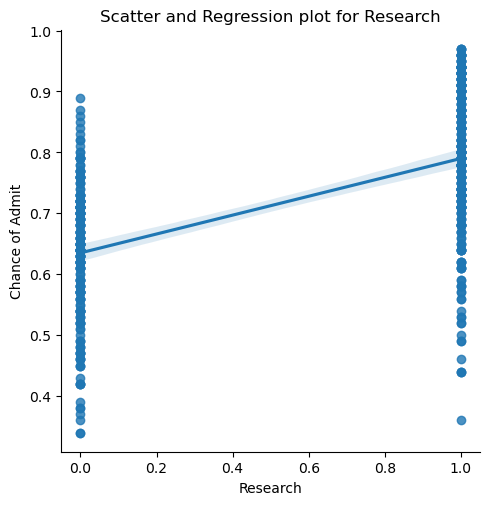

Pearson Correlation:
 Serial No.           0.008505
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64


In [162]:
# Scatter plots and regression plots
for col in X_sm.columns:
    if col != "const":
        sns.lmplot(x=col, y="Chance of Admit", data=df)
        plt.title(f"Scatter and Regression plot for {col}")
        plt.show()

# Pearson Correlation
print("Pearson Correlation:\n", df.corr()["Chance of Admit"])

### Test for Homoscedasticity

Scatterplot of Residuals vs. Predicted Values

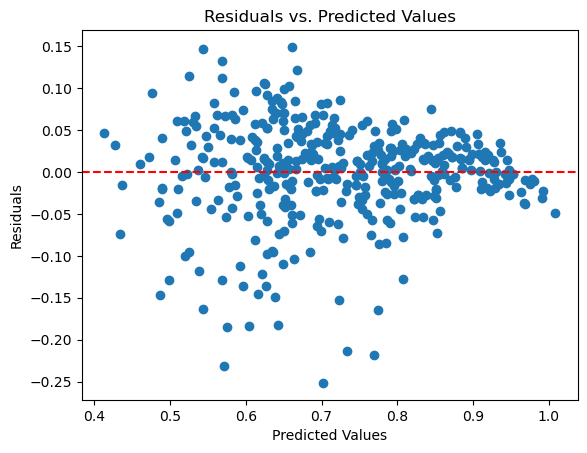

In [165]:
predicted = results.predict(X_sm)
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

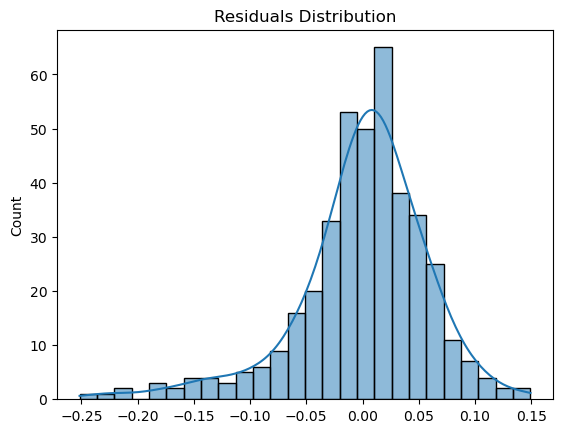

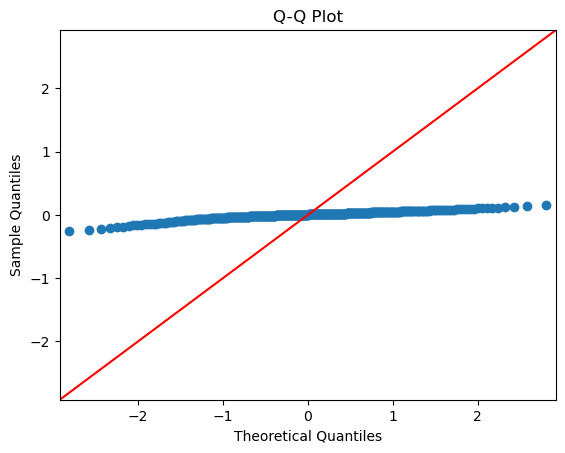

In [171]:
# Histogram
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

### Measuring Model Performance

In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
                      
# Predictions
predictions = results.predict(X_test)

# Mean Absolute Error

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("-" * 50)
print(f"Root Mean Square Error (RMSE): {rmse}")

# R-squared and Adjusted R-squared
r_squared = results.rsquared
adjusted_r_squared = results.rsquared_adj
print('-' * 50)
print(f"R-squared: {r_squared}")
print('-' * 50)
print(f"Adjusted R-squared: {adjusted_r_squared}")
print("-" * 50)

Mean Absolute Error (MAE): 11.723050708592034
--------------------------------------------------
Root Mean Square Error (RMSE): 11.821731914162832
--------------------------------------------------
R-squared: 0.8331501879322587
--------------------------------------------------
Adjusted R-squared: 0.8297363810357321
--------------------------------------------------


## Insights and Recomendations

#### Insights
___Key Predictors:___ GRE Score, TOEFL Score, CGPA: Significant factors influencing admission probabilities.

___Multicollinearity:___ No significant issues, ensuring model robustness despite high correlations among predictors.

___Model Performance:___ Linear Regression model captured up to 82% of the variance in admission probabilities.

___Exploratory Data Analysis:___ 
1. Admission probabilities exhibit left-skewed distributions. 
2. Strong positive correlations identified between exam scores and admission chances.

___Data Distribution___

1. Admission Probabilities: Left-skewed distributions.
2. Exam Scores: Strong positive correlation with admission chances.

___Model Performance___
Linear Regression: High performance, capturing 82% variance.

___Multicollinearity Check___ Result: No significant multicollinearity issues detected.
___Model Predictors___ Significant Factors: GRE Score, TOEFL Score, CGPA, and LOR.

#### ___Recommendations___

___Focus Areas for Students:___

Improve GRE scores and CGPA.
Enhance the quality of Letters of Recommendation (LOR).

___Data Collection:___ 
Collect broader data beyond academic metrics, including extracurricular achievements, personal statements, and diversity factors.

___Additional Features:___
Integrate diverse features such as research experience, work experience, internships, and extracurricular activities to enrich the predictive model.

___ Data Augmentation:___
Enhance Predictive Power: Implement additional data collection to capture a holistic profile of applicants.

___Feature Enhancement:___
Incorporate Diverse Metrics: Including research, work experience, internships, and extracurricular activities to improve model accuracy.

### Conclusion
By focusing on key predictors and integrating additional diverse features, we can enhance the admissions process, providing valuable insights and support to both applicants and educational institutions.